In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image # for the showing of images

#http://en.wikipedia.org/wiki/Subtropics#mediaviewer/File:World_map_indicating_tropics_and_subtropics.png
#pandas = Image('./panditaBambu.jpg', width=(100,100)) 
bye = Image('./images/panditaBye.png', width=(100,100)) 
#longitude = Image('./longitude.png', width=(100,100)) # wikipedia

%matplotlib inline

# 1. Pandas

<img src="files/images/panditaBambu.jpg" />

**References:**

* http://pandas.pydata.org/
* Cookbook — pandas 0.14.0 documentation

## 1.1 Reading CSV files

In [4]:
D = pd.read_csv("amazonianBirds.csv")#, sep = ',') # data obtaied from http://www.xeno-canto.org/

## 1.2 What is in this csv file?

Number of lines, names of the columns?

In [80]:
D.describe()

longitude     latitude          toe
count  8588.000000  8588.000000  8588.000000
mean    -48.545462   -17.311786     6.616528
std       6.771690     8.606486     3.456227
min     -72.722000   -32.566200    -0.709677
25%     -52.653000   -23.566700     3.806452
50%     -48.183000   -20.708400     7.161290
75%     -44.033618    -9.598100     9.524194
max     -34.854000     4.666700    12.000000

In [76]:
D.to_csv("ama.txt", columns=['latitude', 'longitude', 'toe'], sep=' ')

Get a taste of the file

In [79]:
D.head() # shows the first 5 lines, try D.tail()

recordist        date   time  \
0   Daniel Lane  2011-02-24  05:55   
1   Daniel Lane  2011-02-24  06:05   
2  Eric DeFonso  2011-09-03  18:00   
3  Eric DeFonso  2011-09-04  06:00   
4  Eric DeFonso  2011-09-04  06:05   

                                         location  longitude  latitude  \
0  10 km S Pocone on Transpantaneira, Mato Grosso   -56.6480  -16.3620   
1  10 km S Pocone on Transpantaneira, Mato Grosso   -56.6480  -16.3620   
2                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   
3                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   
4                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   

  elevation   climate       toe  
0       115  tropical  1.225806  
1       115  tropical  1.225806  
2       110  tropical  8.903226  
3       110  tropical  8.870968  
4       110  tropical  8.870968

# 2. Selecting and plotting a column

### 2.0.1 Selecting a column from the data frame

In [82]:
print(len(D.longitude))
D['longitude'].head(n = 10 )

8588


0   -56.6480
1   -56.6480
2   -56.8764
3   -56.8764
4   -56.8764
5   -55.9320
6   -49.8559
7   -39.0501
8   -60.7501
9   -62.2167
Name: longitude, dtype: float64

<img src="files/images/longitude.png" />

## 2.1 Plotting the data

### 2.1.1 Plotting a column

In [ ]:

D['longitude'].plot( title = 'Longitude')
D['latitude'].plot( title = 'latitude')
plt.savefig('images/series.png')

### 2.1.2 Scatter plot with two columns

In [39]:
import seaborn as sns

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


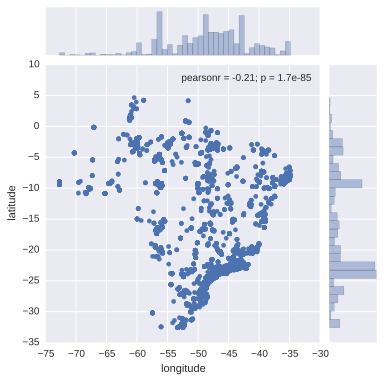

In [40]:
sns.jointplot(x="longitude", y="latitude", data=D)

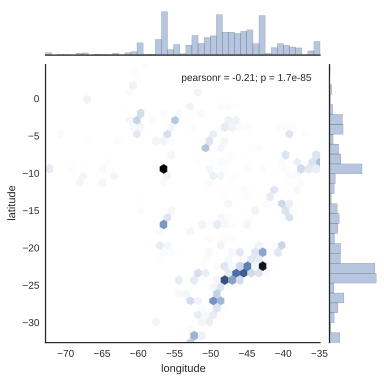

In [41]:
with sns.axes_style("white"):
    sns.jointplot(x="longitude", y="latitude", data=D, kind="hex")

### 2.1.3 Plotting histograms

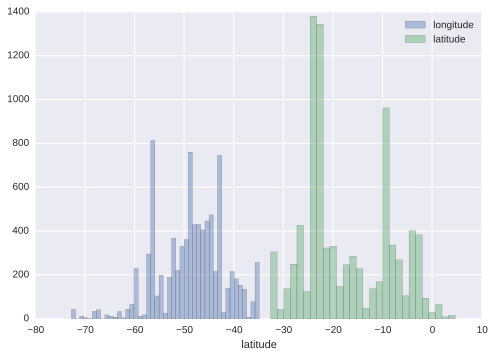

In [45]:
sns.distplot(D['longitude'], kde = False, label = 'longitude')
sns.distplot(D['latitude'], kde = False, label = 'latitude')
plt.legend()

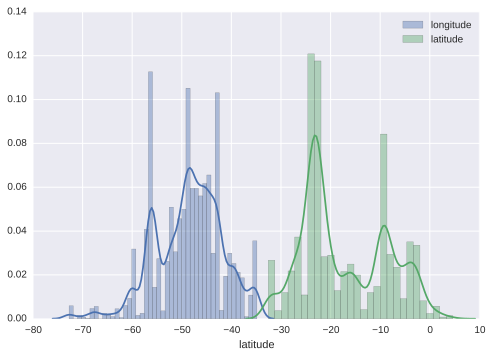

In [46]:
sns.distplot(D['longitude'], kde = True, label = 'longitude')
sns.distplot(D['latitude'], kde = True, label = 'latitude')
plt.legend()

In [55]:
from scipy import stats

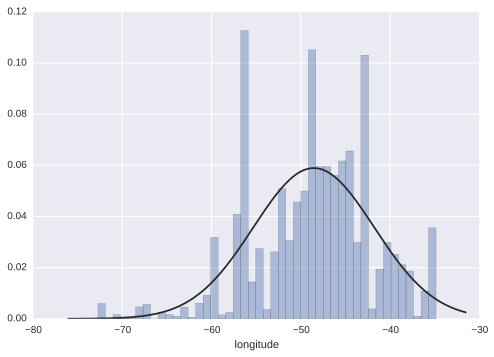

In [60]:
sns.distplot(D['longitude'], kde = False, fit=stats.norm)

### 2.1.4 Quick comprehensize pairwise visualization:

In [75]:
sns.pairplot(D)

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


# 3. Selecting data

#### 3.0.0.1 Symmetry

In [22]:
D['date'][:5] # first five elements
D[:5]['date']
D.date[:5]

0    2011-02-24
1    2011-02-24
2    2011-09-03
3    2011-09-04
4    2011-09-04
Name: date, dtype: object

#### 3.0.0.2 Selection of multiple columns

In [23]:
D[['date', 'time', 'latitude']][:3] # first three elements

date   time  latitude
0  2011-02-24  05:55  -16.3620
1  2011-02-24  06:05  -16.3620
2  2011-09-03  18:00  -16.7581

#### 3.0.0.3 Conditional selection

In [24]:
D_nor = D.loc[D.latitude > 0]
print(len(D_nor))
D_nor.tail(n=3)

90


recordist        date   time  \
8268             Jeremy Minns  2000-12-03  10:51   
8364  Thiago Orsi Laranjeiras  2012-11-07  18:00   
8574  Thiago Orsi Laranjeiras  2009-08-26  08:30   

                                               location  longitude  latitude  \
8268                  Porto Grande, AP. Hotel Sonho Meu   -51.4834    0.6834   
8364  Estrada Perdida, Parque Nacional do Viruá, Car...   -60.9869    1.4022   
8574  Trilha do Buritizal - Serra do Viruá - Parque ...   -60.9891    1.4829   

     elevation  
8268        60  
8364        50  
8574        90

## 3.1 Combination of conditions to select data

#### 3.1.0.1 Which recordings were done by Jeremy Minns during the year 2002?

In [25]:
# condition 1: recordings from Jeremy Minns
JM_recs = D['recordist'] == 'Jeremy Minns'

# condition 2: recordings done in 2002
data2002 = D.date.str.contains('2002') # string methods"

# select data
JM2002 = D[JM_recs & data2002]

JM2002.head(n=3)

recordist        date   time                 location  longitude  \
8   Jeremy Minns  2002-09-26  17:30  Anavilhanas Archipelago   -60.7501   
9   Jeremy Minns  2002-09-27  15:00           Rio Caurés, AM   -62.2167   
10  Jeremy Minns  2002-09-27  15:50           Rio Caurés, AM   -62.2167   

    latitude elevation  
8    -2.6834        21  
9    -1.2667        21  
10   -1.2667        21

## 3.2 Visualize the distribution of discrete values

### 3.2.1 Who is the recordist with the largest number of observations?

'value_counts()' returns the values of the given series sorted from the most frequent to the least

In [121]:
counts = D['recordist'].value_counts()
print("Number of recordists", len(counts))
counts[:10]  # the top ten recorders

Number of recordists 232


Jeremy Minns         1522
GABRIEL LEITE         571
Antonio Silveira      326
Ricardo Gagliardi     324
Noé Eiterer           279
Marcos Melo           273
Adrian Eisen Rupp     265
Nick Athanas          241
Eric DeFonso          239
Evair Legal           201
Name: recordist, dtype: int64

In [132]:
count_sorted = pd.DataFrame({'recordist':counts.index, 'num':counts})

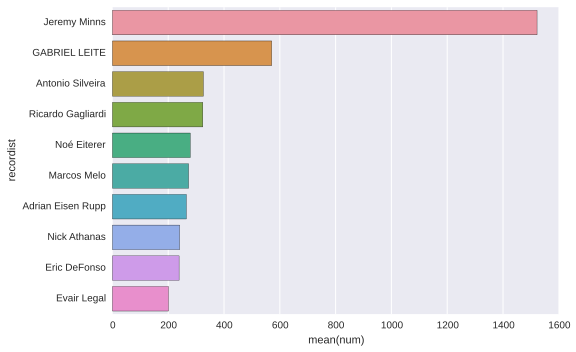

In [133]:
sns.barplot(y = 'recordist', x = 'num', data = count_sorted[:10], orient = 'h')

## Categorical plots: 

### Who covered which area?

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


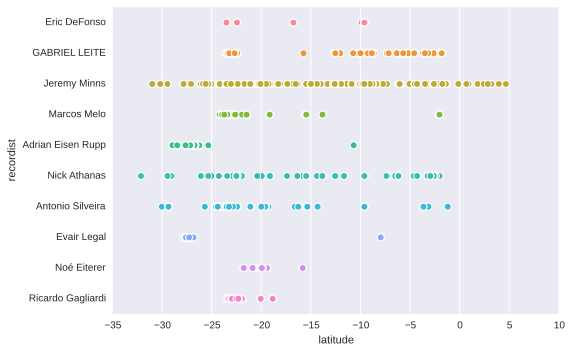

In [136]:
sns.stripplot(y = "recordist", x = "latitude",\
              data=D[D['recordist'].isin(count_sorted[:10]['recordist'])],\
             orient = 'h')

### Violinplot: KDE on the same data

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


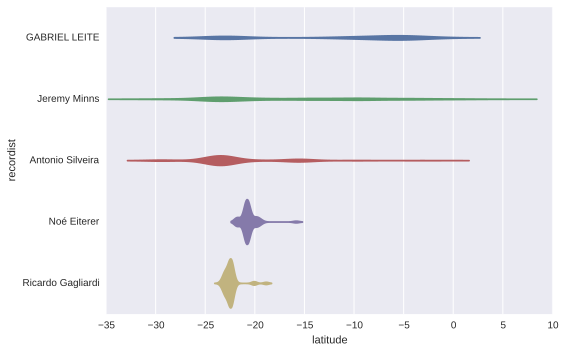

In [139]:
sns.violinplot(x="latitude", y="recordist",\
               data=D[D['recordist'].isin(count_sorted[:5]['recordist'])], inner=None)
#sns.stripplot(x="latitude", y="recordist",\
#              data=D[D['recordist'].isin(count_sorted[:5]['recordist'])], jitter=True, size=4);

### Combining the two:

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


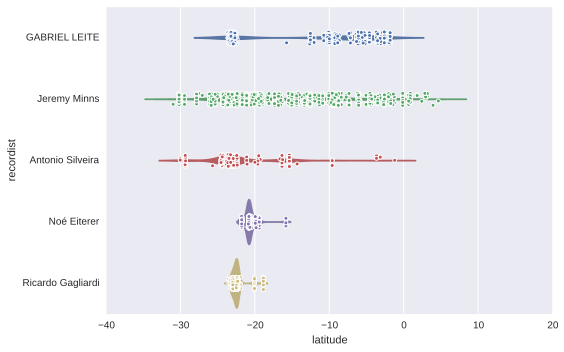

In [140]:
sns.violinplot(x="latitude", y="recordist",\
               data=D[D['recordist'].isin(count_sorted[:5]['recordist'])], inner=None)
sns.stripplot(x="latitude", y="recordist",\
              data=D[D['recordist'].isin(count_sorted[:5]['recordist'])], jitter=True, size=4);

# 4. Add new columns

## 4.1 Determine the climate region of the birds

In [30]:
tropics = Image('./images/world.png', width=(300,300))
#http://en.wikipedia.org/wiki/Subtropics#mediaviewer/File:World_map_indicating_tropics_and_subtropics.png

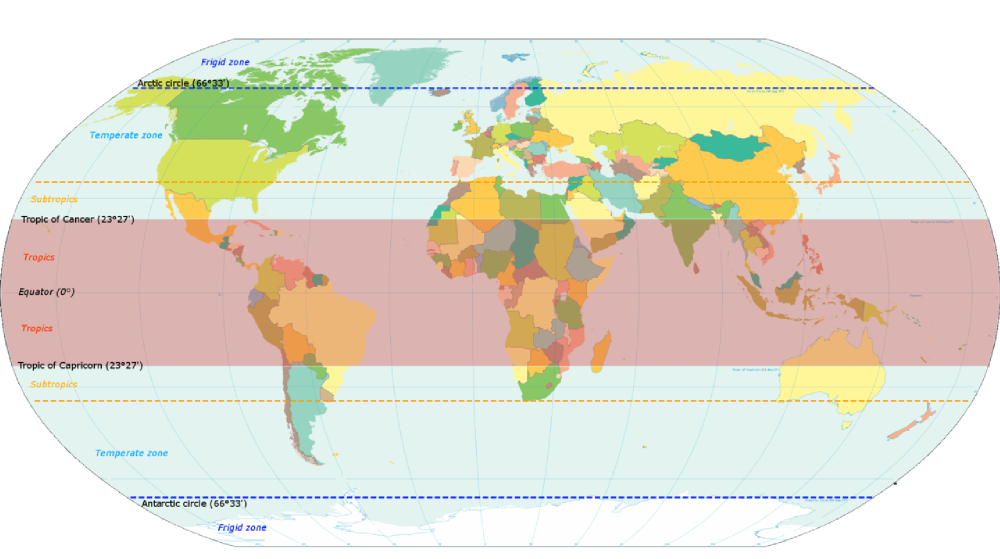

In [31]:
tropics

## 4.2 Adding columns

In [32]:
tropT = -23.4378 # latitude of the tropic of Capricorn
# generate an array with the values of the new column
climateRegion = ['tropical' if item > tropT else 'subtropical' for item in D.latitude] # using list comprehension
# define que new column
D['climate'] = climateRegion 
D.head()

recordist        date   time  \
0   Daniel Lane  2011-02-24  05:55   
1   Daniel Lane  2011-02-24  06:05   
2  Eric DeFonso  2011-09-03  18:00   
3  Eric DeFonso  2011-09-04  06:00   
4  Eric DeFonso  2011-09-04  06:05   

                                         location  longitude  latitude  \
0  10 km S Pocone on Transpantaneira, Mato Grosso   -56.6480  -16.3620   
1  10 km S Pocone on Transpantaneira, Mato Grosso   -56.6480  -16.3620   
2                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   
3                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   
4                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   

  elevation   climate  
0       115  tropical  
1       115  tropical  
2       110  tropical  
3       110  tropical  
4       110  tropical

(-90, -10)

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


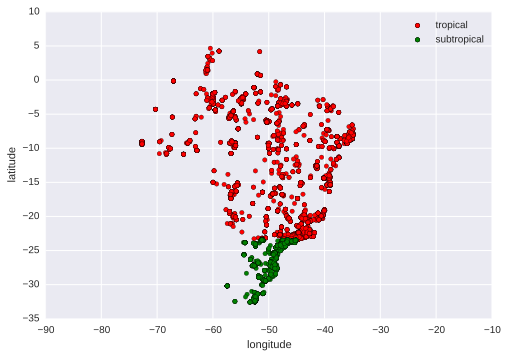

In [73]:
DsubT = D[D.climate == 'subtropical']
DT = D[D.climate == 'tropical']

# plot
plt.scatter( DT.longitude, DT.latitude, c = 'r', label = 'tropical')
plt.scatter( DsubT.longitude, DsubT.latitude, c = 'g', label = 'subtropical')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.xlim(-90, -10)

## 4.3 Save as csv

In [34]:
D.to_csv('amazonianBirds_climate.csv', index = False)

In [35]:
# read what we just saved
D_new = pd.read_csv('amazonianBirds_climate.csv')
D_new.head()

recordist        date   time  \
0   Daniel Lane  2011-02-24  05:55   
1   Daniel Lane  2011-02-24  06:05   
2  Eric DeFonso  2011-09-03  18:00   
3  Eric DeFonso  2011-09-04  06:00   
4  Eric DeFonso  2011-09-04  06:05   

                                         location  longitude  latitude  \
0  10 km S Pocone on Transpantaneira, Mato Grosso   -56.6480  -16.3620   
1  10 km S Pocone on Transpantaneira, Mato Grosso   -56.6480  -16.3620   
2                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   
3                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   
4                    Pantanal Wildlife Center, MT   -56.8764  -16.7581   

  elevation   climate  
0       115  tropical  
1       115  tropical  
2       110  tropical  
3       110  tropical  
4       110  tropical

## 4.4 Group

In [36]:
engCounts = D.groupby('climate')
engCounts.head(n=3)

recordist        date   time  \
0           Daniel Lane  2011-02-24  05:55   
1           Daniel Lane  2011-02-24  06:05   
2          Eric DeFonso  2011-09-03  18:00   
86    Adrian Eisen Rupp  2009-09-30      ?   
87  Bernabe Lopez-Lanus  2007-07-07    ?:?   
88        Frank Lambert  1997-12-17    ?:?   

                                          location  longitude   latitude  \
0   10 km S Pocone on Transpantaneira, Mato Grosso -56.648000 -16.362000   
1   10 km S Pocone on Transpantaneira, Mato Grosso -56.648000 -16.362000   
2                     Pantanal Wildlife Center, MT -56.876400 -16.758100   
86       FLONA de Chapecó, Guatambu, Sana Catarina -52.778000 -27.100000   
87                  SF de Paula, Rio Grande do Sul -50.583889 -29.447778   
88                    Santa Catarina, near Urubici -49.580000 -27.830000   

   elevation      climate  
0        115     tropical  
1        115     tropical  
2        110     tropical  
86       573  subtropical  
87         ?  subtropical  
88      1000  subtropical

# Regression and model fitting:

## Linear regression

In [207]:
fd = sns.load_dataset("flights")

In [208]:
year_data = fd.groupby('year').sum()

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


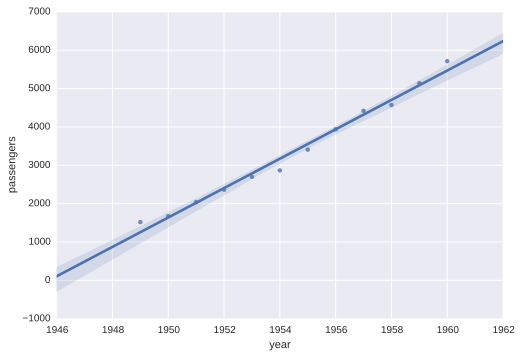

In [196]:
sns.regplot(x=year_data.index.to_series(), y = year_data['passengers'])

## Quadratic regression

In [204]:
month_data = fd.groupby('month').sum()


/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


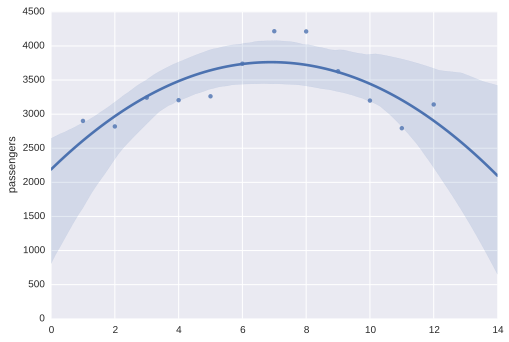

In [213]:
sns.regplot(x=np.arange(1,13), y = month_data['passengers'], order = 2)

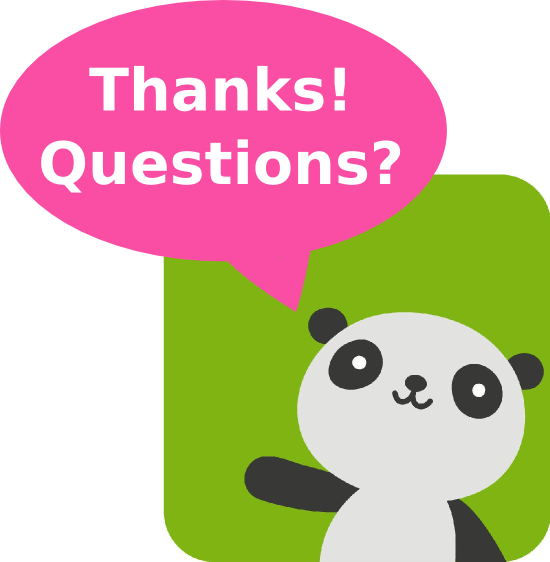

In [211]:
bye